## LONG SHORT TERM MEMORY FOR AMAZON STOCK

An LSTM Network has its origin in a RNN. But it can solve the memory loss by changing the neuron architecture.

The new neuron has 3 gates, each with a different goal. The gates are:

1.Input Gate

2.Output Gate

3.Forget Gate

An LSTM Neuron still receives as input its previous state:

LSTM Neuron passing as parameter its previous state.

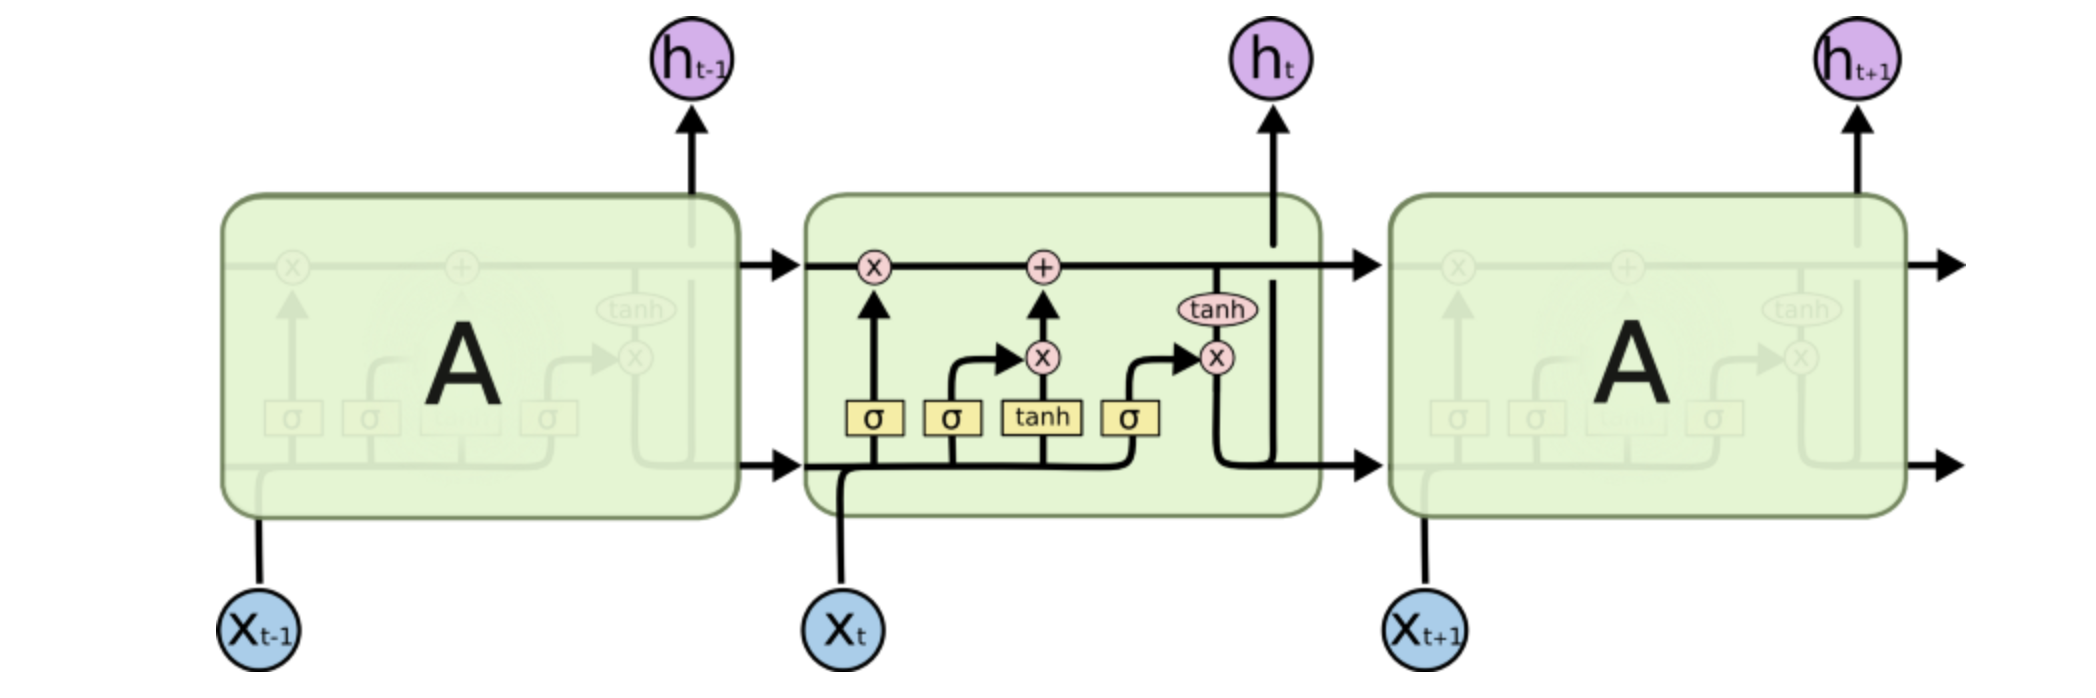

#### Following steps are done:

1. Clean up the data-Remove any NAs

2. Create a test, train and validate set

3. Create train for Close Price

4. Normalize data

5. Train, test data and check with validation set

6. Make a prediction

7. Based on this prediction find if the feature extraction method of LSTM works

In [12]:
# Importing all the required packages and libraries

import math
from math import sqrt
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import Dense, Activation

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [13]:
#Fetching data for Amazon Stock for 5 years

df = web.DataReader('AMZN', data_source='yahoo', start='2014-01-01', end='2019-12-31') 
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001
2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002
2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005
2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999
2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013
2014-01-09,406.890015,398.440002,403.709991,401.010010,2103000,401.010010
2014-01-10,403.760010,393.799988,402.529999,397.660004,2679500,397.660004
2014-01-13,399.779999,388.450012,397.980011,390.980011,2844900,390.980011
2014-01-14,398.630005,391.290009,392.130005,397.540009,2340100,397.540009


In [14]:
print(df.shape)

(1510, 6)


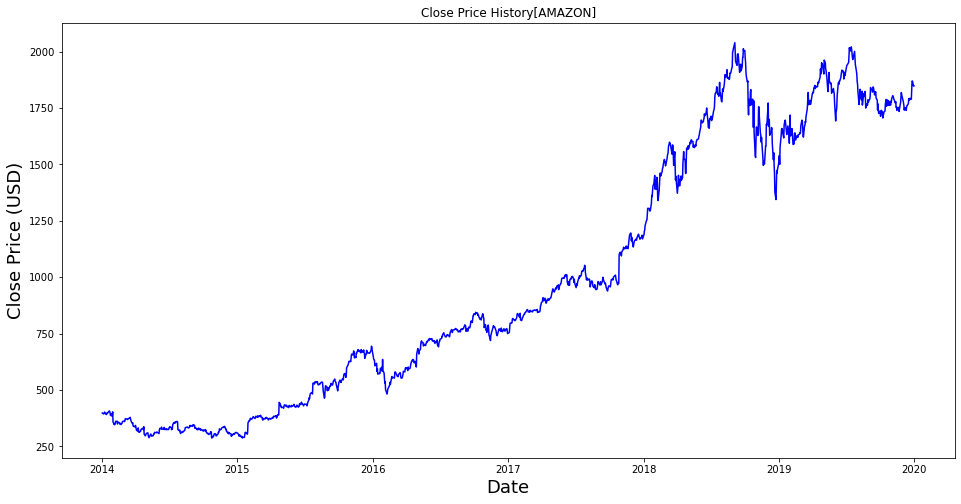

In [15]:
# Visualize the closing price history for Amazon stock

plt.figure(figsize=(16,8))
plt.title('Close Price History[AMAZON]')
plt.plot(df['Close'], color='b')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [16]:
# Create a new dataframe with only the 'Close' column.
data = df.filter(['Close'])

# Converting the dataframe to a numpy array.
dataset = data.values

# Compute the number of rows to train the model on.

training_data_len = math.ceil( len(dataset) *.8)

In [17]:
# Min-Max Normalization.
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [18]:
# Create the scaled training dataset.
train_data = scaled_data[0:training_data_len, :]

# Split the data into X_train and y_train data sets
X_train=[]
y_train = []

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [19]:
# Convert x_train and y_train to numpy arrays.
X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
# Reshape the data into the shape accepted by the LSTM.
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [25]:
# Build the LSTM network model.
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=25, return_sequences=False))
model.add(Activation('linear'))
model.add(Dense(units=1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
lstm_14 (LSTM)               (None, 25)                7600      
_________________________________________________________________
activation_1 (Activation)    (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 18,026
Trainable params: 18,026
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model.
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
# Train the model.
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1148/1148 [==============================] - 17s 15ms/step - loss: 0.0026
Epoch 2/10
1148/1148 [==============================] - 18s 16ms/step - loss: 8.0850e-04
Epoch 3/10
1148/1148 [==============================] - 18s 16ms/step - loss: 7.2571e-04
Epoch 4/10
1148/1148 [==============================] - 17s 15ms/step - loss: 4.8738e-04
Epoch 5/10
1148/1148 [==============================] - 17s 15ms/step - loss: 4.1932e-04
Epoch 6/10
1148/1148 [==============================] - 17s 15ms/step - loss: 4.0287e-04
Epoch 7/10
1148/1148 [==============================] - 18s 15ms/step - loss: 2.8450e-04
Epoch 8/10
1148/1148 [==============================] - 17s 15ms/step - loss: 2.9268e-04
Epoch 9/10
1148/1148 [==============================] - 18s 15ms/step - loss: 2.3168e-04
Epoch 10/10
1148/1148 [==============================] - 17s 15ms/step - loss: 2.6810e-04


In [28]:
# Test dataset.
test_data = scaled_data[training_data_len-60:, :]

# Create the x_test and y_test datasets.
X_test = []
y_test =  dataset[training_data_len:, :]
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i, 0])

In [29]:
# Convert x_test to a numpy array.
X_test = np.array(X_test)

In [30]:
# Reshape the data into the shape accepted by the LSTM.
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [31]:
# Getting the models predicted price values.
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) #Undo scaling

In [32]:
# Calculate/Get the value of RMSE.
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
mse = mean_squared_error(predictions,y_test)
rmse_new = sqrt(mse)
r = r2_score(predictions,y_test)

In [33]:
print('RMSE = {}',rmse)
print('R-Squared Score = {}',r)

RMSE = {} 46.76465205537687
R-Squared Score = {} 0.836778766554912


In [34]:
# Plot/Create the data for the graph.
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

RMSE = {} 46.76465205537687
R-Squared Score = {} 0.836778766554912


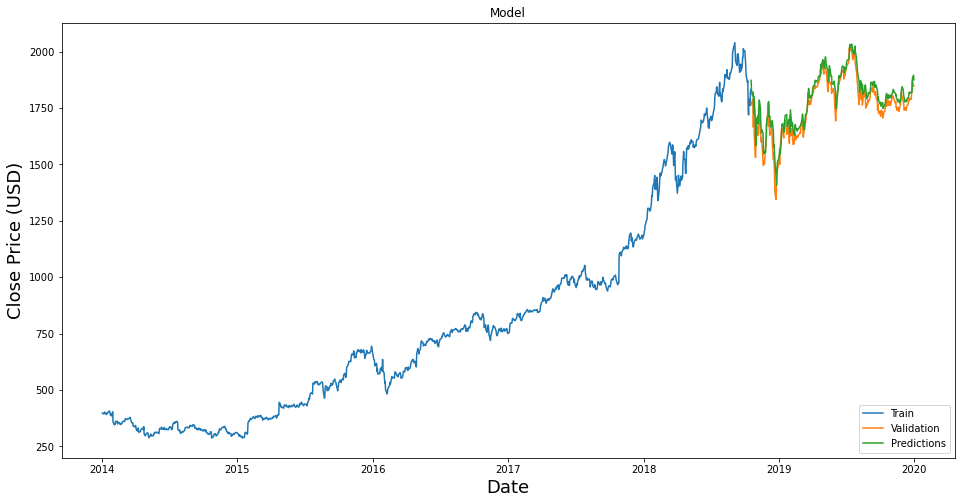

In [35]:
# Visualize the data.
print('RMSE = {}',rmse)
print('R-Squared Score = {}',r)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [36]:
valid

,Close,Predictions
Date,,
2018-10-18,1770.719971,1872.767700
2018-10-19,1764.030029,1821.768188
2018-10-22,1789.300049,1803.700806
2018-10-23,1768.699951,1821.172363
2018-10-24,1664.199951,1809.104980
...,...,...
2019-12-24,1789.209961,1820.770508
2019-12-26,1868.770020,1818.897583
2019-12-27,1869.800049,1882.505127


In [37]:
# import backtest_functions as bt

# backtest_data = pd.DataFrame()
# backtest_data['P_Open'] = list(list(testPredict[:,0]))
# btdata = df[(df["Date"] > test_start_date) & (df["Date"] < test_end_date)]
# backtest_data['R_Open'] = list(btdata['Open'])
# backtest_data['R_Close'] = list(btdata['Close'])
# backtest_data['R_High'] = list(btdata['High'])
# backtest_data['SP_Open'] = list(btdata['S&P 500-Open'])
# backtest_data['SP_Close'] = list(btdata['S&P-Close'])
# BackTest = bt.Back_Test(backtest_data)
# r2 = sklearn.metrics.r2_score(backtest_data['R_Open'],backtest_data['P_Open'])
# print("R_2 value Test: ",r2)
# print("Sharpe Ratio : ",BackTest[0])
# print("Treynor Ratio: ",BackTest[1])
# print("Profit: ",BackTest[2])
# print("Hit Rate: ",BackTest[3])
